In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [5]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [6]:
mensual_p = mensual['n_trips']

In [7]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [8]:
mensual_p = mensual_p.reset_index()

In [9]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [298]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 1000, mcmc_samples=100, interval_width= 0.7, seasonality_prior_scale=1,changepoint_prior_scale =0.04)

# Entrenamos el modelo
prophet_1.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_1.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/52wokrqq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/6_ktyrxb.json
01:22:18 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=44276', 'data', 'file=/tmp/tmplnvzjdhf/52wokrqq.json', 'init=/tmp/tmplnvzjdhf/6_ktyrxb.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelsuni8rjb/prophet_model-20241119012218_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=44276', 'data', 'file=/tmp/tmplnvzjdhf/52wokrqq.json', 'init=/tmp/tmplnvzjdhf/6_ktyrxb.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelsuni8rjb/prophet_model-20241119012218_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

01:22:21 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=44276', 'data', 'file=/tmp/tmplnvzjdhf/52wokrqq.json', 'init=/tmp/tmplnvzjdhf/6_ktyrxb.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelsuni8rjb/prophet_model-20241119012218_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modelsuni8rjb/prophet_model-20241119012218_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modelsuni8rjb/prophet_model-20241119012218_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [299]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.834477e+06,2.965001e+06,3.191326e+06,2.767460e+06,2.905353e+06,247154.403623,178642.465977,317025.466687,247154.403623,178642.465977,317025.466687,0.0,0.0,0.0,3.081632e+06
1,2022-04-30,2.818177e+06,2.879098e+06,3.082411e+06,2.751439e+06,2.884493e+06,162530.900799,94665.573985,231883.915523,162530.900799,94665.573985,231883.915523,0.0,0.0,0.0,2.980708e+06
2,2022-05-31,2.800976e+06,2.937069e+06,3.135869e+06,2.741043e+06,2.858352e+06,235607.809387,166857.032476,310447.539235,235607.809387,166857.032476,310447.539235,0.0,0.0,0.0,3.036584e+06
3,2022-06-30,2.785131e+06,2.820034e+06,3.025090e+06,2.725909e+06,2.842214e+06,135430.458057,77160.381134,202483.898110,135430.458057,77160.381134,202483.898110,0.0,0.0,0.0,2.920561e+06
4,2022-07-31,2.768423e+06,2.496867e+06,2.704345e+06,2.709751e+06,2.825798e+06,-171093.173460,-229756.869569,-112891.365500,-171093.173460,-229756.869569,-112891.365500,0.0,0.0,0.0,2.597330e+06
5,2022-08-31,2.750934e+06,2.424576e+06,2.635597e+06,2.691040e+06,2.803563e+06,-221482.049910,-276879.908775,-164157.269007,-221482.049910,-276879.908775,-164157.269007,0.0,0.0,0.0,2.529452e+06
6,2022-09-30,2.733208e+06,2.410120e+06,2.625767e+06,2.677073e+06,2.790221e+06,-219589.810190,-299045.769046,-139602.341347,-219589.810190,-299045.769046,-139602.341347,0.0,0.0,0.0,2.513618e+06
7,2022-10-31,2.713611e+06,2.845111e+06,3.070136e+06,2.658113e+06,2.770209e+06,239715.932718,152314.943615,342164.997767,239715.932718,152314.943615,342164.997767,0.0,0.0,0.0,2.953327e+06
8,2022-11-30,2.694154e+06,2.510667e+06,2.741130e+06,2.638661e+06,2.751625e+06,-68012.375135,-141576.289238,2532.793544,-68012.375135,-141576.289238,2532.793544,0.0,0.0,0.0,2.626142e+06
9,2022-12-31,2.673387e+06,2.610165e+06,2.849357e+06,2.616643e+06,2.731316e+06,53729.996510,-26425.109914,130897.891101,53729.996510,-26425.109914,130897.891101,0.0,0.0,0.0,2.727117e+06


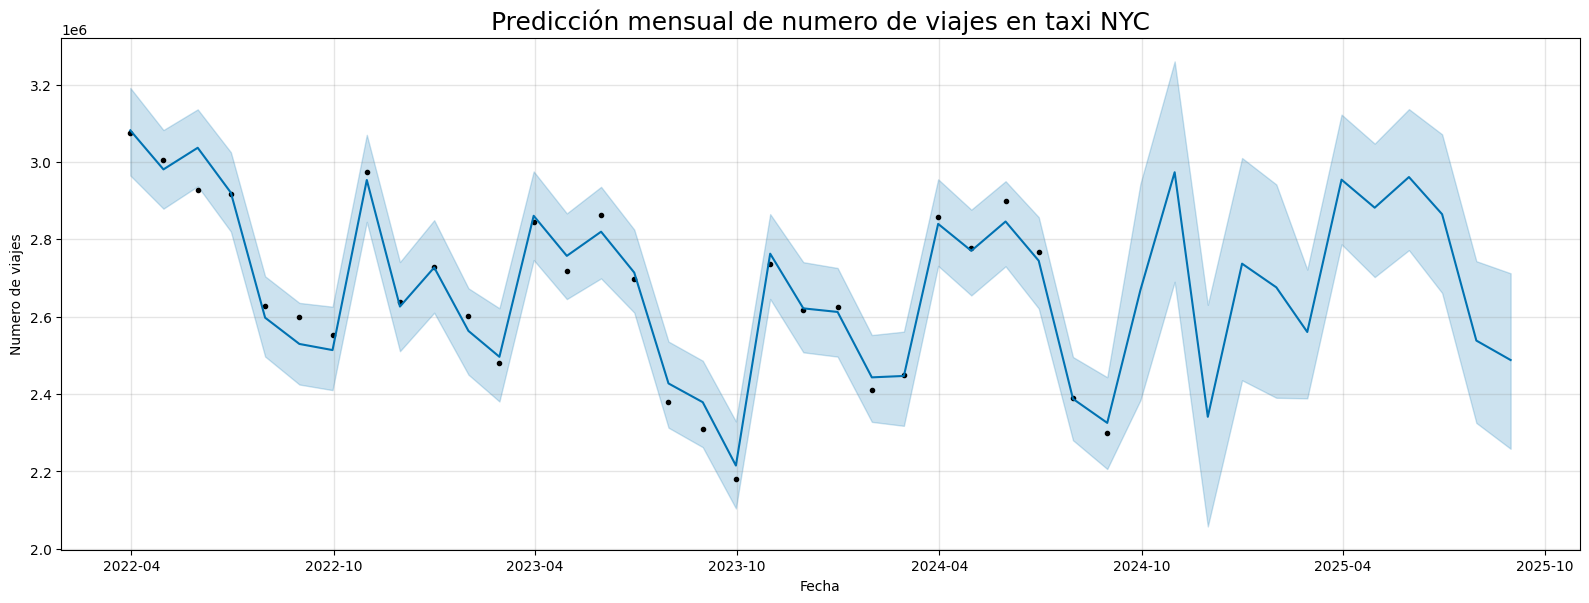

In [300]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

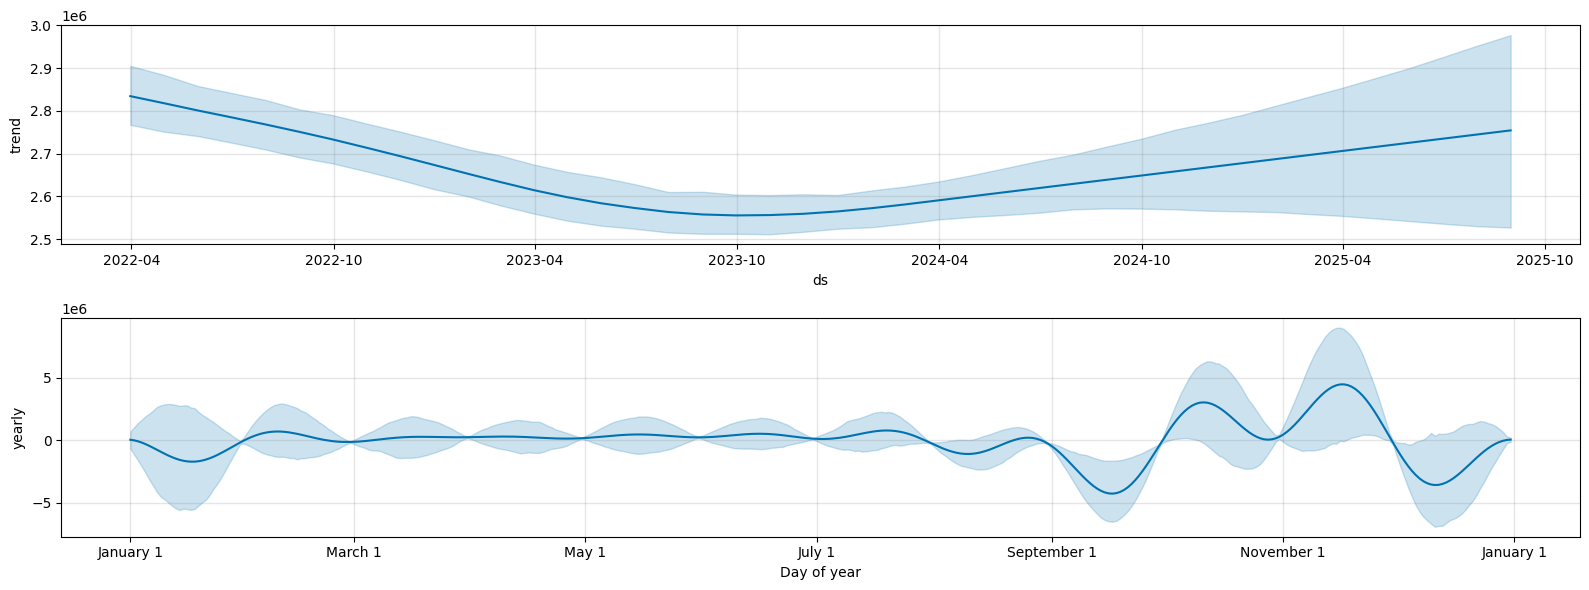

In [301]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Evaluacion

In [302]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [303]:
df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/kk4kz2zv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/i9h5noop.json
01:22:22 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=2683', 'data', 'file=/tmp/tmplnvzjdhf/kk4kz2zv.json', 'init=/tmp/tmplnvzjdhf/i9h5noop.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modeldjhm_hci/prophet_model-20241119012222_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=2683', 'data', 'file=/tmp/tmplnvzjdhf/kk4kz2zv.json', 'init=/tmp/tmplnvzjdhf/i9h5noop.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modeldjhm_hci/prophet_model-20241119012222_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:

01:22:25 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=2683', 'data', 'file=/tmp/tmplnvzjdhf/kk4kz2zv.json', 'init=/tmp/tmplnvzjdhf/i9h5noop.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modeldjhm_hci/prophet_model-20241119012222_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modeldjhm_hci/prophet_model-20241119012222_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modeldjhm_hci/prophet_model-20241119012222_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)
 

In [304]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-09-30,2.356248e+06,2.043905e+06,2.672717e+06,2179200,2023-09-01
1,2023-10-31,2.798647e+06,2.517602e+06,3.074847e+06,2736389,2023-09-01
2,2023-11-30,2.391164e+06,2.080892e+06,2.688238e+06,2616757,2023-09-01
3,2023-12-31,2.567236e+06,2.249066e+06,2.935702e+06,2625768,2023-09-01
4,2024-01-31,2.312427e+06,2.013093e+06,2.606990e+06,2409342,2023-09-01
5,2024-02-29,2.083839e+06,1.282508e+06,2.847271e+06,2448952,2023-09-01
6,2024-03-31,2.708480e+06,2.430419e+06,3.006551e+06,2858661,2023-09-01
7,2024-04-30,2.698945e+06,2.435603e+06,2.991019e+06,2777362,2023-09-01
8,2024-05-31,2.276782e+06,1.924393e+06,2.646653e+06,2899539,2023-09-01
9,2024-06-30,2.496849e+06,2.146371e+06,2.873321e+06,2767032,2023-09-01


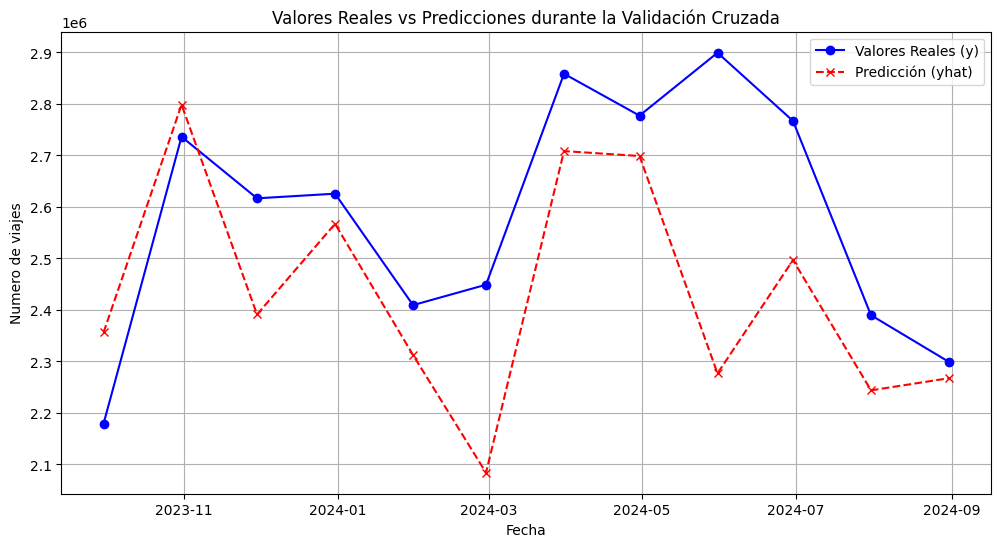

In [305]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


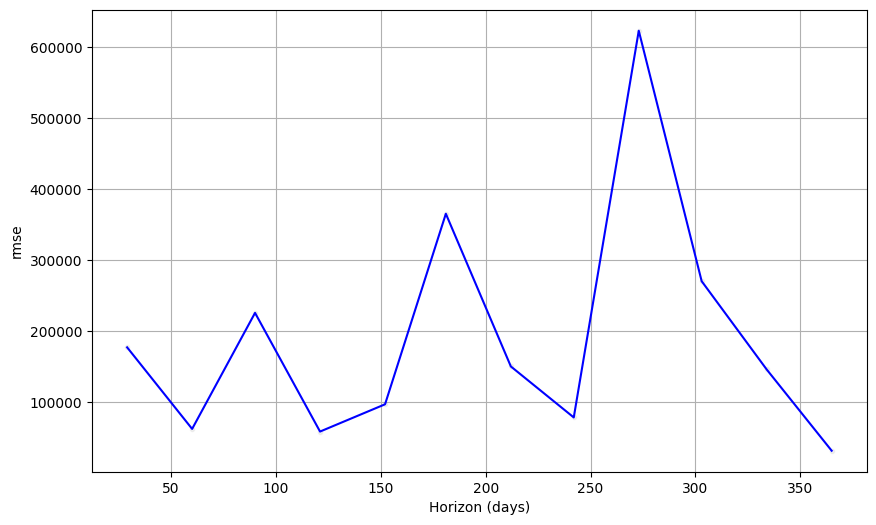

In [306]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [307]:
df_p_1 = performance_metrics(df_cv_1)

In [308]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 190375.5157640451


In [309]:
print('El MAE es:', df_p_1.mae.mean())

El MAE es: 190375.5157640451


In [310]:
print('La cobertura es:', df_p_1.coverage.mean())

La cobertura es: 0.9166666666666666


In [311]:
print('La MAPE es:', df_p_1.mape.mean())

La MAPE es: 0.07248372807567706


In [312]:
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,196 days 20:00:00,6.200553e+10,190375.515764,190375.515764,0.072484,0.072484,0.076503,0.916667
std,109 days 20:33:46.987269072,1.095699e+11,167644.725017,167644.725017,0.059533,0.059533,0.066713,0.288675
min,29 days 00:00:00,9.958381e+08,31556.902056,31556.902056,0.013726,0.013726,0.013821,0.000000
25%,113 days 06:00:00,5.580957e+09,74377.410665,74377.410665,0.026864,0.026864,0.027115,1.000000
50%,196 days 12:00:00,2.192824e+10,148066.766385,148066.766385,0.056805,0.056805,0.058475,1.000000
75%,280 days 12:00:00,5.641897e+10,236740.739023,236740.739023,0.089069,0.089069,0.093235,1.000000
max,365 days 00:00:00,3.878259e+11,622756.683127,622756.683127,0.214778,0.214778,0.240617,1.000000


In [313]:
df_p = performance_metrics(df_cv_1, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,6.200553e+10,249009.092223,190375.515764,0.072484,0.056805,0.076503,0.916667


In [314]:
forecast_1.to_csv('forecast_mensual.csv')